In [2]:
import pandas as pd
import numpy as np
import pycaret as pc
#print('PyCaret: %s' % pycaret.__version__)
import matplotlib.pyplot as plt

In [65]:
df_main = pd.read_csv('df_train_data.csv').set_index('Unnamed: 0')
#Shape : 11333,65
#df_main.head()
df_main.shape

(11333, 69)

In [66]:
df_main

,Tikr_x,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,...,OPM__yr_5,OPM__yr_2_YoY,OPM__yr_3_YoY,OPM__yr_4_YoY,OPM__yr_5_YoY,Return,Year,Tikr_y,Nifty_Returns,Return_adj
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,20MICRONS,175.00,234.00,262.00,275.00,288.00,33.714286,11.965812,4.961832,4.727273,...,8.00,-9.090909,20.000000,0.000000,-33.333333,-33.654476,2015,NIFTY50,55.560600,-89.215076
1,21STCENMGM,1.18,23.45,-4.20,0.12,1.08,1887.288136,-117.910448,-102.857143,800.000000,...,-13.89,62.893357,-100.000000,-inf,-96.376490,NaN,2015,NIFTY50,55.560600,NaN
2,3IINFOTECH,692.00,963.00,1120.00,1198.00,1278.00,39.161850,16.303219,6.964286,6.677796,...,7.00,12.500000,-11.111111,-12.500000,0.000000,-57.339140,2015,NIFTY50,55.560600,-112.899739
3,3MINDIA,1087.00,1191.00,1405.00,1574.00,1742.00,9.567617,17.968094,12.028470,10.673443,...,6.00,0.000000,-30.769231,-22.222222,-14.285714,135.517239,2015,NIFTY50,55.560600,79.956639
4,3PLAND,70.27,99.43,125.64,133.58,137.98,41.497083,26.360253,6.319643,3.293906,...,5.88,-144.940476,-271.523179,69.111969,34.246575,NaN,2015,NIFTY50,55.560600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11328,ZODJRDMKJ,16.09,18.06,20.00,14.85,12.54,12.243630,10.741971,-25.750000,-15.555556,...,1.20,-12.183908,-187.696335,-170.447761,-49.152542,-30.903230,2021,NIFTY50,45.743173,-76.646404
11329,ZOTA,64.00,70.00,77.00,85.00,95.00,9.375000,10.000000,10.389610,11.764706,...,5.00,-6.666667,0.000000,-35.714286,-44.444444,NaN,2021,NIFTY50,45.743173,NaN
11330,ZUARI,5264.00,4077.00,4648.00,4731.00,50.00,-22.549392,14.005396,1.785714,-98.943141,...,-1162.00,75.000000,0.000000,-71.428571,-58200.000000,-73.543487,2021,NIFTY50,45.743173,-119.286660


In [67]:
# Removing rows containing nans
df_main = df_main[df_main['Return'].notna()]
df_main.shape
#8436,65

(8436, 69)

<AxesSubplot:>

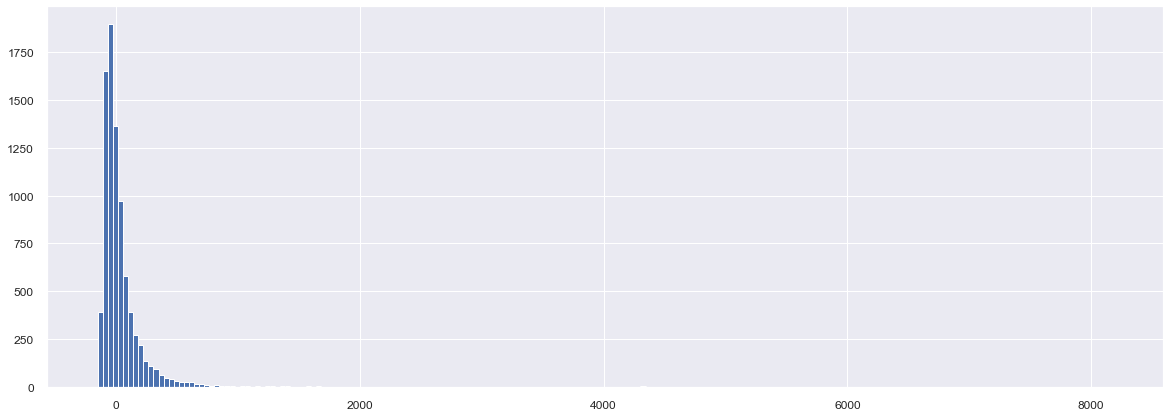

In [68]:
fig = plt.figure(figsize = (20,7))
ax = fig.gca()
df_main.replace([np.inf, -np.inf], 0, inplace=True)
df_main.fillna(0, inplace=True)
#df_main['Return'].replace([np.inf, -np.inf], 0, inplace=True)
df_main['Return_adj'].hist(bins = 200)
# From the distribution it seems most of the values are lying between -10 to 10.. that makes sense as well.

In [10]:
#df_main['Return_adj'].boxplot(column = 'Return_adj')

In [69]:
#Running a classification problem
# Creating two classes, 0 & 1
df_main['Return_class'] = np.where(df_main['Return_adj'] > 0,1,0)
df_main['Corona_Yr'] = np.where(df_main['Year	'] == 2020,1,0)

# Keeping 2021 data reserved for validation
df_validation = df_main[(df_main['Year'] == 2021)]

# Removing 2021 data .. as it is reserved for Validation
df_train = df_main[~(df_main['Year'] == 2021)]
df_train = df_train.drop(['Return_adj','Return','Tikr_x','Tikr_y','Nifty_Returns'],axis=1)
print(pd.DataFrame(df_main['Return_class'].value_counts()))
print(df_main['Return_class'].value_counts(normalize=True))

   Return_class
0          4878
1          3558
0    0.578236
1    0.421764
Name: Return_class, dtype: float64


In [70]:
# Upsampling dataset for minority class
from sklearn.utils import resample

minority_label = 1
majority_label = 0

print('minority_label -', minority_label)
print('majority_label -', majority_label)

df_majority = df_train[df_train['Return_class']==majority_label]
df_minority = df_train[df_train['Return_class']==minority_label]

upsample_count = df_train['Return_class'].value_counts()[majority_label]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=upsample_count,    # to match majority class
                                 random_state=317) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled['Return_class'].value_counts())

minority_label - 1
majority_label - 0
1    4878
0    4878
Name: Return_class, dtype: int64


In [75]:
from pycaret import classification
# setup the environment 
classification_setup = classification.setup(data= df_upsampled, target='Return_class',silent=True)

,Description,Value
0,session_id,3143
1,Target,Return_class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9756, 65)"
5,Missing Values,False
6,Numeric Features,63
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [76]:
# build the decision tree model
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7687,0.7707,0.8000,0.7514,0.7749,0.5375,0.5386
1,0.7775,0.7777,0.8265,0.7513,0.7871,0.5551,0.5579
2,0.7467,0.7480,0.8000,0.7215,0.7587,0.4936,0.4966
3,0.7467,0.7472,0.7765,0.7313,0.7532,0.4935,0.4945
4,0.7862,0.7873,0.8299,0.7628,0.7949,0.5725,0.5747
5,0.7570,0.7581,0.8123,0.7309,0.7694,0.5140,0.5172
6,0.7570,0.7593,0.8387,0.7204,0.7751,0.5140,0.5211
7,0.7452,0.7465,0.8123,0.7158,0.7610,0.4906,0.4951
8,0.7789,0.7816,0.8065,0.7639,0.7846,0.5579,0.5587
9,0.7683,0.7716,0.8588,0.7264,0.7871,0.5369,0.5460


In [77]:
xgb = classification_setup('xgboost')

TypeError: 'tuple' object is not callable

In [78]:
# ensemble boosting
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7921,0.8724,0.7794,0.7982,0.7887,0.5841,0.5843
1,0.7862,0.8589,0.8029,0.7756,0.7890,0.5725,0.5729
2,0.7921,0.8811,0.8176,0.7765,0.7966,0.5843,0.5851
3,0.7760,0.8779,0.7765,0.7742,0.7753,0.5520,0.5520
4,0.7892,0.8744,0.8006,0.7822,0.7913,0.5783,0.5785
5,0.7936,0.8721,0.8240,0.7762,0.7994,0.5872,0.5883
6,0.7936,0.8850,0.7947,0.7924,0.7936,0.5871,0.5871
7,0.7980,0.8703,0.7889,0.8030,0.7959,0.5959,0.5960
8,0.8082,0.8762,0.7859,0.8221,0.8036,0.6164,0.6170
9,0.7815,0.8764,0.8235,0.7588,0.7898,0.5632,0.5652


In [79]:
# compare performance of different classification models
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8317,0.9132,0.8461,0.8224,0.8338,0.6635,0.6643,0.8300
et,Extra Trees Classifier,0.8279,0.9140,0.8388,0.8206,0.8293,0.6559,0.6565,0.5490
lightgbm,Light Gradient Boosting Machine,0.8114,0.8813,0.8529,0.7870,0.8185,0.6229,0.6252,0.5900
dt,Decision Tree Classifier,0.7632,0.7648,0.8161,0.7376,0.7746,0.5266,0.5300,0.1370
gbc,Gradient Boosting Classifier,0.7603,0.8352,0.7780,0.7507,0.7639,0.5206,0.5213,2.4400
ada,Ada Boost Classifier,0.7300,0.8016,0.7383,0.7254,0.7315,0.4600,0.4604,0.5070
ridge,Ridge Classifier,0.6970,0.0000,0.7498,0.6776,0.7117,0.3942,0.3967,0.0230
lda,Linear Discriminant Analysis,0.6970,0.7588,0.7498,0.6776,0.7117,0.3942,0.3967,0.0580
knn,K Neighbors Classifier,0.6146,0.6485,0.6902,0.5984,0.6409,0.2295,0.2324,0.2010
lr,Logistic Regression,0.5983,0.6279,0.7721,0.5723,0.6572,0.1975,0.2106,0.5410


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3143, verbose=0,
                       warm_start=False)

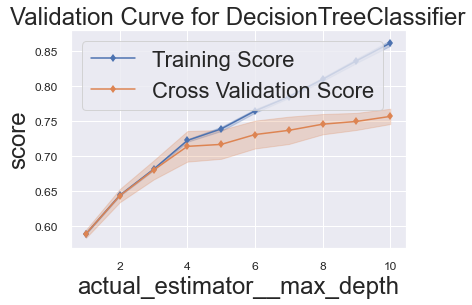

In [80]:
# Precision Recall Curve
classification.plot_model(classification_dt, plot = 'pr')

# Validation Curve
classification.plot_model(classification_dt, plot = 'vc')

In [81]:
# evaluate model
classification.evaluate_model(classification_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [83]:
# First method did not yield any results so now I will be trying basic models again manually, previous approach was more of an automated approach.
# Trying XgBoost & LGBM
import numpy as np 
import pandas as pd 
import seaborn as sns
import optuna
import matplotlib.pyplot as plt
%matplotlib inline

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [91]:
df_upsampled.head()

,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,Expenses_yr_1,...,OPM__yr_2,OPM__yr_3,OPM__yr_4,OPM__yr_5,OPM__yr_2_YoY,OPM__yr_3_YoY,OPM__yr_4_YoY,OPM__yr_5_YoY,Year,Return_class
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,175.0,234.0,262.0,275.0,288.0,33.714286,11.965812,4.961832,4.727273,157.0,...,10.0,12.0,12.0,8.0,-9.090909,20.000000,0.000000,-33.333333,2015,0
2,692.0,963.0,1120.0,1198.0,1278.0,39.161850,16.303219,6.964286,6.677796,633.0,...,9.0,8.0,7.0,7.0,12.500000,-11.111111,-12.500000,0.000000,2015,0
10,375.0,495.0,661.0,723.0,685.0,32.000000,33.535354,9.379728,-5.255878,319.0,...,17.0,13.0,17.0,11.0,13.333333,-23.529412,30.769231,-35.294118,2015,0
12,1182.0,1191.0,639.0,797.0,820.0,0.761421,-46.347607,24.726135,2.885822,476.0,...,61.0,42.0,42.0,47.0,1.666667,-31.147541,0.000000,11.904762,2015,0
18,7637.0,9576.0,11275.0,11061.0,11645.0,25.389551,17.742272,-1.898004,5.279812,6045.0,...,20.0,19.0,15.0,13.0,-4.761905,-5.000000,-21.052632,-13.333333,2015,0


In [92]:
X = df_upsampled.drop(['Return_class'],axis=1)
Y = df_upsampled['Return_class'] 
print(X.shape, Y.shape)

(9756, 64) (9756,)


In [93]:
# spliting the data in to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2021)
print(X_train.shape)
print(X_test.shape)

(7804, 64)
(1952, 64)


In [94]:
y_train.value_counts(normalize = True)
#y_test.value_counts(normalize = True)

1    0.50141
0    0.49859
Name: Return_class, dtype: float64

In [95]:
xgb_model = XGBClassifier().fit(X_train, y_train, 
                                eval_set=[(X_test, y_test)], 
                                eval_metric='auc', 
                                early_stopping_rounds=300, verbose = 0)

In [96]:
lgb_model = LGBMClassifier().fit(X_train, y_train, 
                                    eval_set=[(X_test, y_test)], 
                                    eval_metric='auc', 
                                    early_stopping_rounds=300, verbose = 0)

In [97]:
#df_train.isnull().values.any()
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(oob_score = True).fit(X_train, y_train)

In [98]:
lgb_y_pred = lgb_model.predict(X_test)
xgb_y_pred = xgb_model.predict(X_test)
rf_y_pred = rf_model.predict(X_test)

In [99]:
lgb_train_oof_preds = lgb_model.predict_proba(X_train)[:,1]
lgb_test_oof_preds = lgb_model.predict_proba(X_test)[:,1]
#lgb_test_preds[test_index] = test_oof_preds

xgb_train_oof_preds = xgb_model.predict_proba(X_train)[:,1]
xgb_test_oof_preds = xgb_model.predict_proba(X_test)[:,1]

rf_train_oof_preds = rf_model.predict_proba(X_train)[:,1]
rf_test_oof_preds = rf_model.predict_proba(X_test)[:,1]

In [100]:
print(": XGB - ROC AUC Score = {}".format(roc_auc_score(y_test, xgb_test_oof_preds)))
print(": LGB - ROC AUC Score = {}".format(roc_auc_score(y_train, lgb_train_oof_preds)))
print(": RF - ROC AUC Score = {}".format(roc_auc_score(y_train, rf_train_oof_preds)))

: XGB - ROC AUC Score = 0.8551306885889624
: LGB - ROC AUC Score = 0.9860368633297215
: RF - ROC AUC Score = 0.9999633837560358


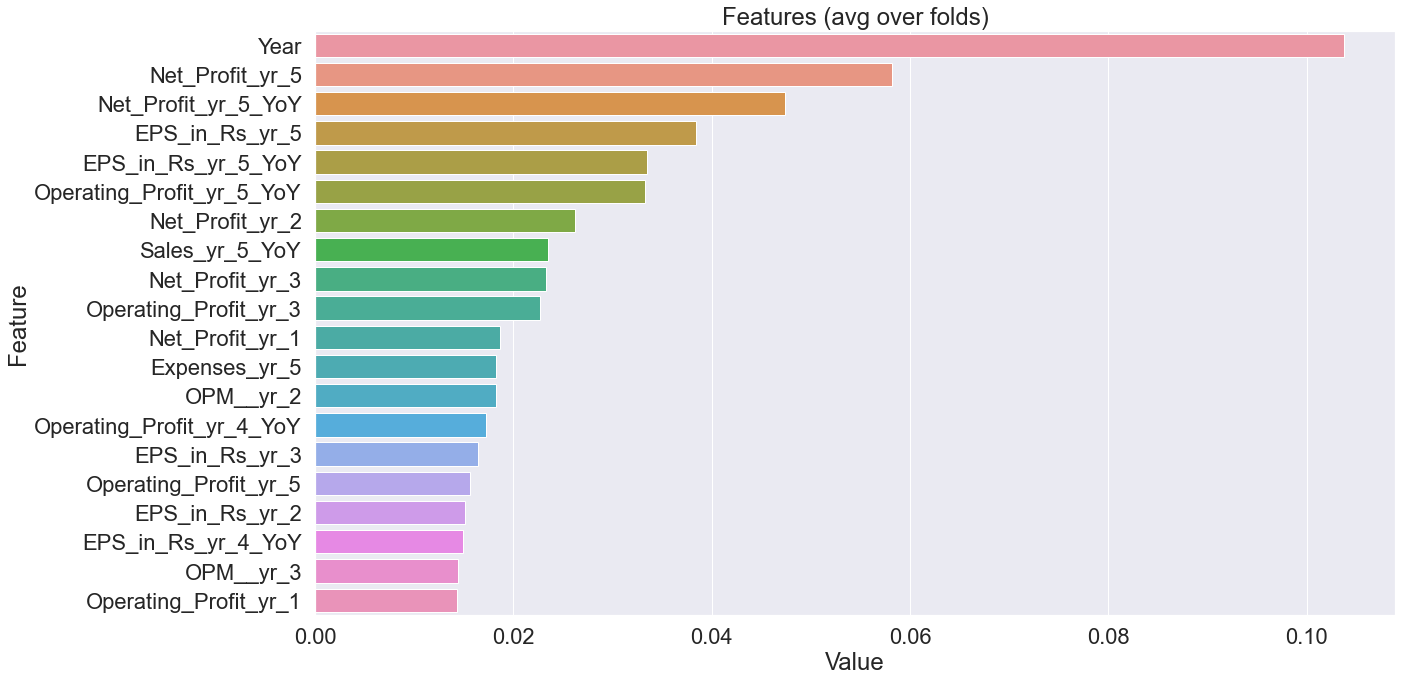

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 20, fig_size = (20, 10)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 2)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()

plotImp(xgb_model,X_train)

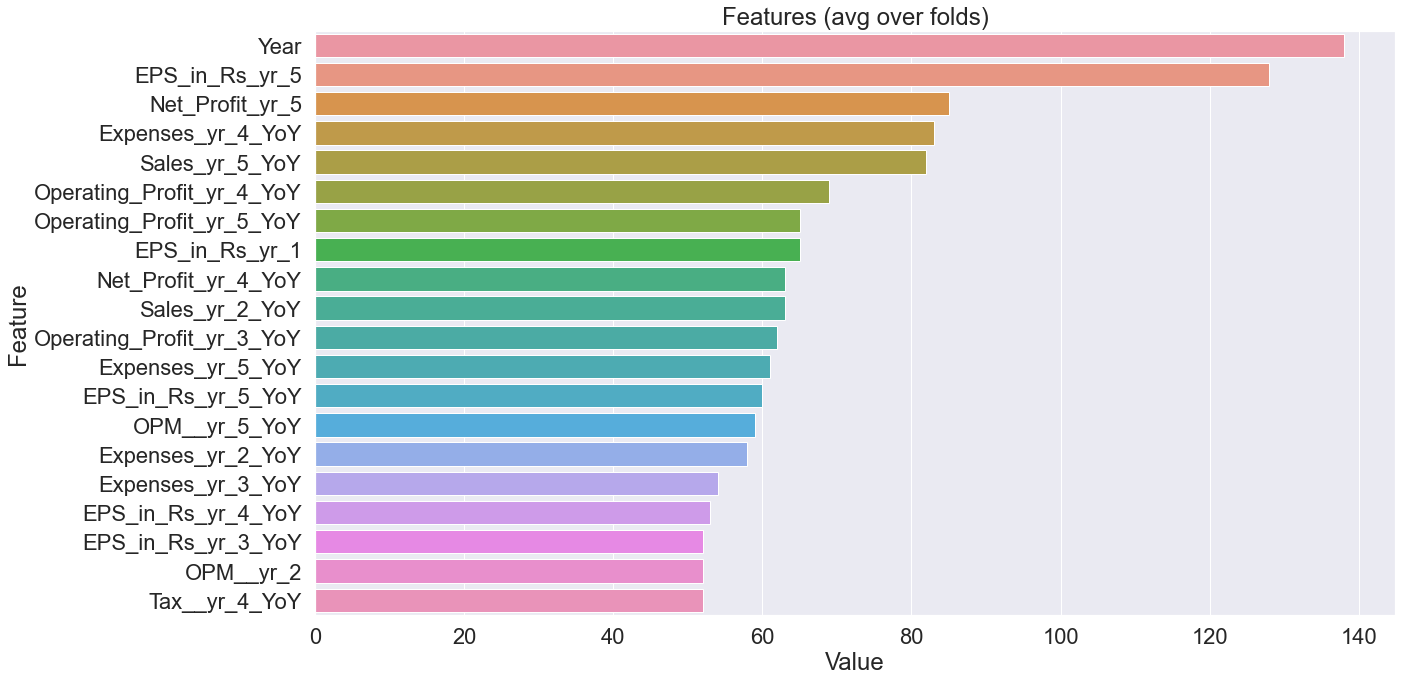

In [102]:
plotImp(lgb_model,X_train)

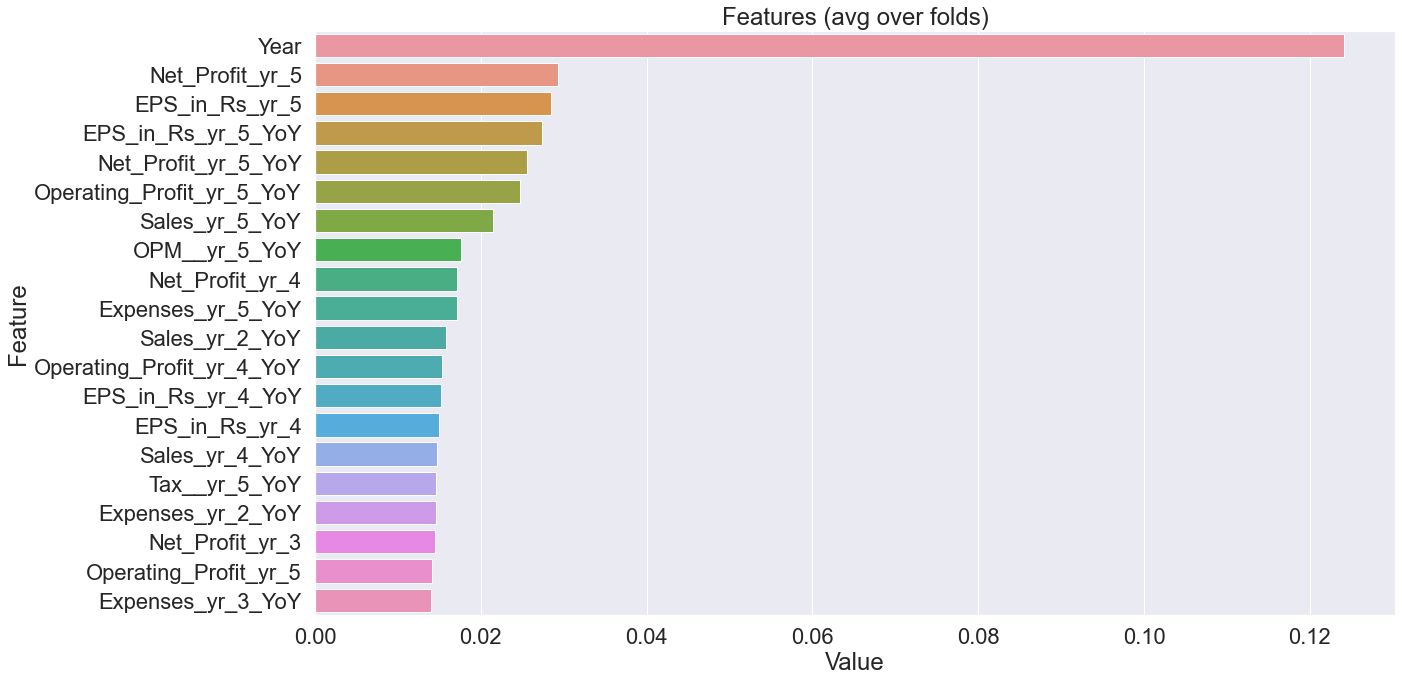

In [103]:
plotImp(rf_model,X_train)

In [104]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("LGBM Accuracy:",accuracy_score(y_test, lgb_y_pred))
print("XGB Accuracy:",accuracy_score(y_test, xgb_y_pred))
print("RF Accuracy:",accuracy_score(y_test, rf_y_pred))

LGBM Accuracy: 0.8309426229508197
XGB Accuracy: 0.7832991803278688
RF Accuracy: 0.8647540983606558


In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import precision_recall_curve

cm = confusion_matrix(y_test, lgb_y_pred)

df_confusion = pd.crosstab(y_test, lgb_y_pred,rownames=['Predicted'], colnames=['Actual'], margins=False)
df_confusion_norm = df_confusion.T / (df_confusion.sum(axis=1)).T
print(cm)
print(df_confusion_norm)

[[778 209]
 [121 844]]
Predicted         0         1
Actual                       
0          0.788247  0.125389
1          0.211753  0.874611


In [106]:
precision, recall, fscore, support = score(y_test, lgb_y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.86540601 0.80151947]
recall: [0.78824721 0.8746114 ]
fscore: [0.82502651 0.83647175]
support: [987 965]


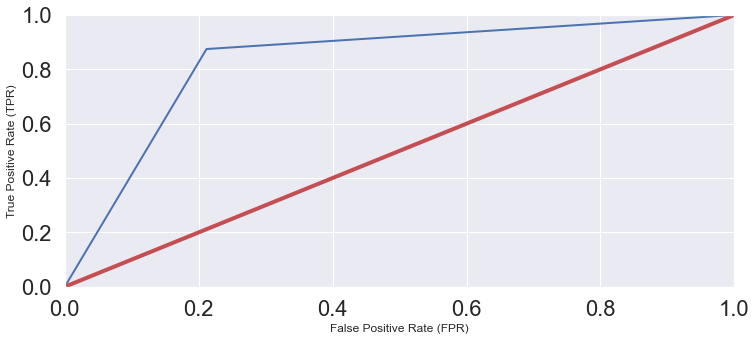

LGB ROC-AUC-Score: 0.8314293063714295


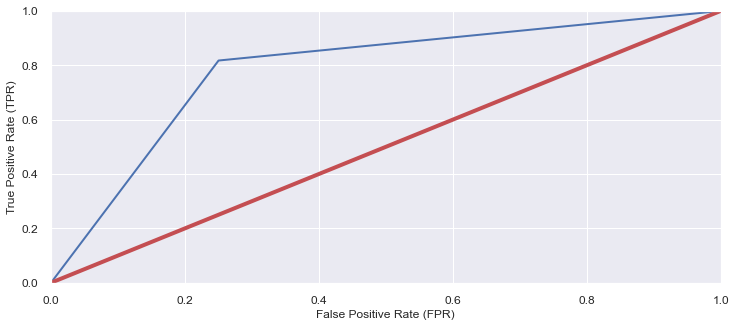

XGB ROC-AUC-Score: 0.7836816437521984


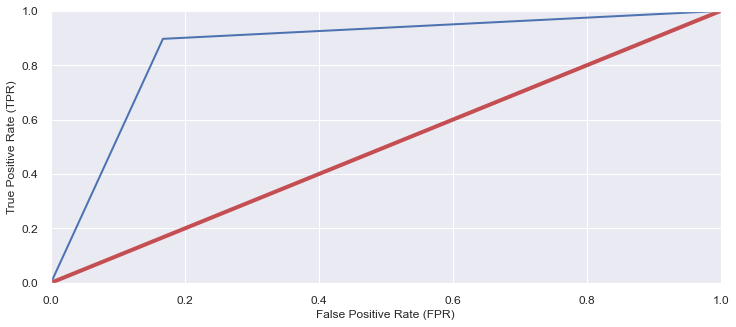

XGB ROC-AUC-Score: 0.8651180370726176


In [107]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
#y_probs = lgb_model.predict_proba(X_test)[:,1]

# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.rc('xtick',labelsize=12)
    plt.rc('ytick',labelsize=12)
    plt.xlabel('False Positive Rate (FPR)', fontsize=12)
    plt.ylabel('True Positive Rate (TPR)', fontsize=12)

# LGB 
y_probs = lgb_model.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()
r_a_score = roc_auc_score(y_test, y_probs)
print("LGB ROC-AUC-Score:", r_a_score)

## XGB - ROC AUC Score
y_probs = xgb_model.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()
r_a_score = roc_auc_score(y_test, y_probs)
print("XGB ROC-AUC-Score:", r_a_score)


## RandomForest - ROC AUC Score
y_probs = rf_model.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()
r_a_score = roc_auc_score(y_test, y_probs)
print("XGB ROC-AUC-Score:", r_a_score)


In [124]:
# df_main.head()
# df_valid = df_upsampled[df_upsampled['Year'] == 2021]
# df_valid = df_valid.drop(['Return_class'],axis=1)
df_valid = df_main[df_main['Year'] == 2021]
df_valid_copy = df_main[df_main['Year'] == 2021] 
df_valid = df_valid.drop(['Return_adj','Return','Tikr_x','Tikr_y','Nifty_Returns','Return_class'],axis=1)
print(df_valid.shape,df_tikr.shape)


(1369, 64) (1369,)


In [121]:
lgb_valid_preds = lgb_model.predict_proba(df_valid)[:,1]
xgb_valid_preds = xgb_model.predict_proba(df_valid)[:,1]
rf_valid_preds = rf_model.predict_proba(df_valid)[:,1]
lgb_y_valid = lgb_model.predict(df_valid)
xgb_y_valid = xgb_model.predict(df_valid)
rf_y_valid = rf_model.predict(df_valid)

In [122]:
pred_list = pd.DataFrame(
    {'lgb_score': lgb_valid_preds,
     'xgb_score': xgb_valid_preds,
     'rf_score': rf_valid_preds,
     'lgb_label': lgb_y_valid,
     'xgb_label': xgb_y_valid,
     'rf_label': rf_y_valid,
    })
pred_list

,lgb_score,xgb_score,rf_score,lgb_label,xgb_label,rf_label
0,0.132125,0.316531,0.040000,0,0,0
1,0.115085,0.105079,0.220000,0,0,0
2,0.159021,0.201333,0.469333,0,0,0
3,0.073006,0.277836,0.100000,0,0,0
4,0.065028,0.172359,0.060000,0,0,0
...,...,...,...,...,...,...
1364,0.038229,0.084054,0.020000,0,0,0
1365,0.065704,0.135622,0.090000,0,0,0
1366,0.022707,0.080964,0.040000,0,0,0
1367,0.086360,0.178738,0.110000,0,0,0


In [136]:
bins = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
labels = ["Bin 1-10","Bin 11-20","Bin 21-30","Bin 31-40","Bin 41-50","Bin 51-60","Bin 61-70","Bin 71-80","Bin 81-90","Bin 91-100"]
pred_list['RandomForest_Bucket'] = pd.cut(pred_list['rf_score'], bins, labels = labels,include_lowest = True)
pred_list['XgBoost_Bucket'] = pd.cut(pred_list['xgb_score'], bins, labels = labels,include_lowest = True)
pred_list['LGBM_Bucket'] = pd.cut(pred_list['lgb_score'], bins, labels = labels,include_lowest = True)

pred_list['rf_decile'] = pd.qcut(pred_list['rf_score'], 10, labels=False)+1
pred_list['lgb_decile'] = pd.qcut(pred_list['lgb_score'], 10, labels=False)+1
pred_list['xgb_decile'] = pd.qcut(pred_list['xgb_score'], 10, labels=False)+1

pred_list['rf_decile'] = 'Decile_' + pred_list['rf_decile'].astype(str).str.pad(2,fillchar='0')
pred_list['lgb_decile'] = 'Decile_' + pred_list['lgb_decile'].astype(str).str.pad(2,fillchar='0')
pred_list['xgb_decile'] = 'Decile_' + pred_list['xgb_decile'].astype(str).str.pad(2,fillchar='0')
pred_list

,lgb_score,xgb_score,rf_score,lgb_label,xgb_label,rf_label,RandomForest_Bucket,XgBoost_Bucket,LGBM_Bucket,rf_decile,lgb_decile,xgb_decile
0,0.132125,0.316531,0.040000,0,0,0,Bin 1-10,Bin 31-40,Bin 11-20,Decile_02,Decile_05,Decile_07
1,0.115085,0.105079,0.220000,0,0,0,Bin 21-30,Bin 11-20,Bin 11-20,Decile_07,Decile_05,Decile_02
2,0.159021,0.201333,0.469333,0,0,0,Bin 41-50,Bin 21-30,Bin 11-20,Decile_09,Decile_06,Decile_05
3,0.073006,0.277836,0.100000,0,0,0,Bin 1-10,Bin 21-30,Bin 1-10,Decile_05,Decile_03,Decile_07
4,0.065028,0.172359,0.060000,0,0,0,Bin 1-10,Bin 11-20,Bin 1-10,Decile_03,Decile_03,Decile_04
...,...,...,...,...,...,...,...,...,...,...,...,...
1364,0.038229,0.084054,0.020000,0,0,0,Bin 1-10,Bin 1-10,Bin 1-10,Decile_01,Decile_02,Decile_01
1365,0.065704,0.135622,0.090000,0,0,0,Bin 1-10,Bin 11-20,Bin 1-10,Decile_04,Decile_03,Decile_03
1366,0.022707,0.080964,0.040000,0,0,0,Bin 1-10,Bin 1-10,Bin 1-10,Decile_02,Decile_01,Decile_01
1367,0.086360,0.178738,0.110000,0,0,0,Bin 11-20,Bin 11-20,Bin 1-10,Decile_05,Decile_04,Decile_05


In [137]:
df_valid_out = pd.concat([df_valid_copy.reset_index(drop=True), pred_list], axis=1)
df_valid_out

,Tikr_x,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,...,rf_score,lgb_label,xgb_label,rf_label,RandomForest_Bucket,XgBoost_Bucket,LGBM_Bucket,rf_decile,lgb_decile,xgb_decile
0,20MICRONS,333.00,357.00,385.00,436.00,490.00,7.207207,7.843137,13.246753,12.385321,...,0.040000,0,0,0,Bin 1-10,Bin 31-40,Bin 11-20,Decile_02,Decile_05,Decile_07
1,21STCENMGM,2.88,1.92,10.51,8.58,-9.71,-33.333333,447.395833,-18.363463,-213.170163,...,0.220000,0,0,0,Bin 21-30,Bin 11-20,Bin 11-20,Decile_07,Decile_05,Decile_02
2,3IINFOTECH,1431.00,1521.00,1833.00,2076.00,1870.00,6.289308,20.512821,13.256956,-9.922929,...,0.469333,0,0,0,Bin 41-50,Bin 21-30,Bin 11-20,Decile_09,Decile_06,Decile_05
3,3MINDIA,2140.00,2363.00,2556.00,2809.00,2765.00,10.420561,8.167584,9.898279,-1.566394,...,0.100000,0,0,0,Bin 1-10,Bin 21-30,Bin 1-10,Decile_05,Decile_03,Decile_07
4,3PLAND,0.09,0.08,0.14,1.84,1.85,-11.111111,75.000000,1214.285714,0.543478,...,0.060000,0,0,0,Bin 1-10,Bin 11-20,Bin 1-10,Decile_03,Decile_03,Decile_04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,ZODIACLOTH,301.00,269.00,236.00,214.00,189.00,-10.631229,-12.267658,-9.322034,-11.682243,...,0.020000,0,0,0,Bin 1-10,Bin 1-10,Bin 1-10,Decile_01,Decile_02,Decile_01
1365,ZODJRDMKJ,16.09,18.06,20.00,14.85,12.54,12.243630,10.741971,-25.750000,-15.555556,...,0.090000,0,0,0,Bin 1-10,Bin 11-20,Bin 1-10,Decile_04,Decile_03,Decile_03
1366,ZUARI,5264.00,4077.00,4648.00,4731.00,50.00,-22.549392,14.005396,1.785714,-98.943141,...,0.040000,0,0,0,Bin 1-10,Bin 1-10,Bin 1-10,Decile_02,Decile_01,Decile_01
1367,ZUARIGLOB,0.00,0.00,17.00,2.00,57.00,0.000000,0.000000,-88.235294,2750.000000,...,0.110000,0,0,0,Bin 11-20,Bin 11-20,Bin 1-10,Decile_05,Decile_04,Decile_05


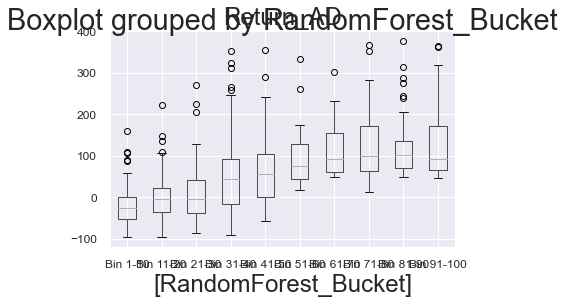

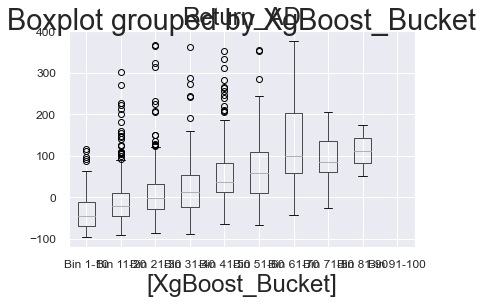

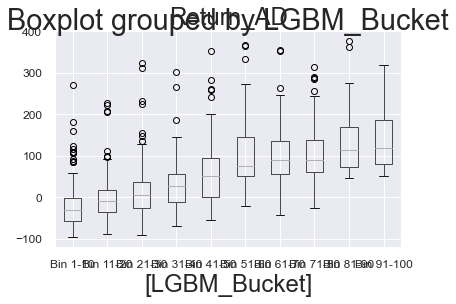

In [172]:
cols = ['Return'] # one or more

Q1 = df_valid_out['Return'].quantile(0.25)
Q3 = df_valid_out['Return'].quantile(0.75)
IQR = Q3 - Q1

#df_valid_out['Return'] < (Q1 - 4 * IQR))

df_valid_out['Return_AD'] = df_valid_out['Return'].mean()
df_valid_out['Return_AD'] = df_valid_out['Return'][~((df_valid_out[cols] < (Q1 - 4 * IQR)) |(df_valid_out[cols] > (Q3 + 4 * IQR))).any(axis=1)]

boxplot = df_valid_out.boxplot(column=['Return_AD'], by=['RandomForest_Bucket'],layout=(1, 1))
boxplot = df_valid_out.boxplot(column=['Return_AD'], by=['XgBoost_Bucket'])
boxplot = df_valid_out.boxplot(column=['Return_AD'], by=['LGBM_Bucket'])

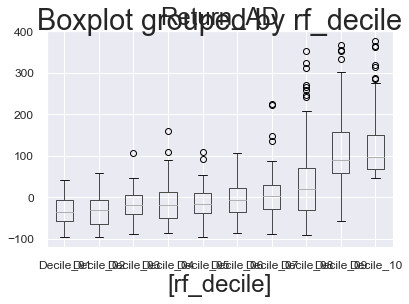

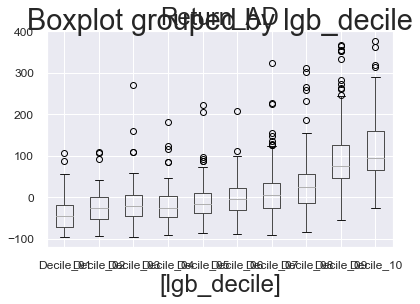

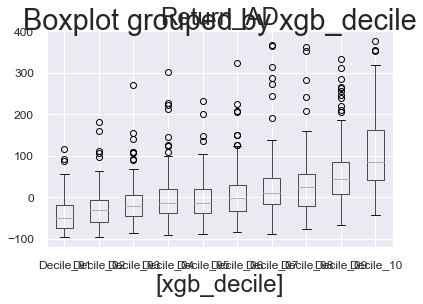

In [174]:
boxplot = df_valid_out.boxplot(column=['Return_AD'], by=['rf_decile'],layout=(1, 1))
boxplot = df_valid_out.boxplot(column=['Return_AD'], by=['lgb_decile'])
boxplot = df_valid_out.boxplot(column=['Return_AD'], by=['xgb_decile'])

## With deciles the results are better concentrated in top deciles


In [173]:
df_valid_out.to_csv('df_validations_2021.csv')